# Preliminary Predictive Analytics Model

## Importing the Libraries

In [1]:
# Importing required packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [2]:
# Uploading the dataset
data=pd.read_csv('jobs_in_data-6.csv')

In [3]:
data.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


* Most data are object data types; only three columns are integer data types. 

In [5]:
data.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


* The lowest salary_in_usd was 15,000, the average wage was 143,000, and the maximum salary was 450,000.

In [6]:
# Missing Value
data.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

* There are no missing data in the dataset.

In [7]:
data.nunique()

work_year                4
job_title              125
job_category            10
salary_currency         11
salary                1507
salary_in_usd         1786
employee_residence      83
experience_level         4
employment_type          4
work_setting             3
company_location        70
company_size             3
dtype: int64

* Salary_in_usd, salary, job_title, employee_residence, and company_location are a few columns that have highly unique variables.

In [8]:
data.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [9]:
objects= data.select_dtypes(include=['object'])
objects

,job_title,job_category,salary_currency,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,Data DevOps Engineer,Data Engineering,EUR,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,Data Architect,Data Architecture and Modeling,USD,United States,Senior,Full-time,In-person,United States,M
2,Data Architect,Data Architecture and Modeling,USD,United States,Senior,Full-time,In-person,United States,M
3,Data Scientist,Data Science and Research,USD,United States,Senior,Full-time,In-person,United States,M
4,Data Scientist,Data Science and Research,USD,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...
9350,Data Specialist,Data Management and Strategy,USD,United States,Senior,Full-time,Remote,United States,L
9351,Data Scientist,Data Science and Research,USD,United States,Senior,Full-time,Remote,United States,L
9352,Principal Data Scientist,Data Science and Research,USD,United States,Mid-level,Full-time,Remote,United States,L
9353,Data Scientist,Data Science and Research,USD,United States,Entry-level,Full-time,Remote,United States,S


* Data showing only categorical variables.

In [10]:
ints= data.select_dtypes(exclude=['object'])
ints

,work_year,salary,salary_in_usd
0,2023,88000,95012
1,2023,186000,186000
2,2023,81800,81800
3,2023,212000,212000
4,2023,93300,93300
...,...,...,...
9350,2021,165000,165000
9351,2020,412000,412000
9352,2021,151000,151000
9353,2020,105000,105000


* Data showing only numerical variables.

In [11]:
# Categorical Data Exploration
data['job_category'].value_counts()

Data Science and Research         3014
Data Engineering                  2260
Data Analysis                     1457
Machine Learning and AI           1428
Leadership and Management          503
BI and Visualization               313
Data Architecture and Modeling     259
Data Management and Strategy        61
Data Quality and Operations         55
Cloud and Database                   5
Name: job_category, dtype: int64

* Data Science and Research, Data Engineering, Data Analysis, and Machine Learning and AI have a good amount of data entries compared to other job categories in the dataset.

In [12]:
data['experience_level'].value_counts()

Senior         6709
Mid-level      1869
Entry-level     496
Executive       281
Name: experience_level, dtype: int64

* The majority of positions are senior level in the dataset.

In [13]:
data['employment_type'].value_counts()

Full-time    9310
Contract       19
Part-time      15
Freelance      11
Name: employment_type, dtype: int64

* Full-time employment has the most amount of data than other employment types in the dataset. 

In [14]:
data['work_setting'].value_counts()

In-person    5730
Remote       3434
Hybrid        191
Name: work_setting, dtype: int64

* Hybrid positions have the lowest amount of entries in the dataset.

In [15]:
data['company_location'].value_counts()

United States     8132
United Kingdom     449
Canada             226
Spain              113
Germany             72
                  ... 
Gibraltar            1
Ecuador              1
Andorra              1
Mauritius            1
Malta                1
Name: company_location, Length: 70, dtype: int64

* The United States has the highest amount of job entries in the dataset compared to other countries.

In [16]:
data['company_size'].value_counts()

M    8448
L     748
S     159
Name: company_size, dtype: int64

* Medium-size companies are the highest compared to small and large companies in the dataset.

## Splitting the Dataset into Independent (X) and Dependent (Y) Variables

In [17]:
data.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [18]:
x=data[['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'employee_residence', 'experience_level','employment_type', 'work_setting', 
        'company_location', 'company_size']]

In [19]:
y=data[['salary_in_usd']]

## Transforming the Data

In [20]:
# pd.get_dummies

x_new=pd.get_dummies(data[['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'employee_residence', 'experience_level','employment_type', 'work_setting', 
        'company_location', 'company_size']]).astype(int)

In [21]:
x_new.head()

,work_year,salary,job_title_AI Architect,job_title_AI Developer,job_title_AI Engineer,job_title_AI Programmer,job_title_AI Research Engineer,job_title_AI Scientist,job_title_AWS Data Architect,job_title_Analytics Engineer,...,company_location_Switzerland,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_size_L,company_size_M,company_size_S
0,2023,88000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2023,186000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2023,81800,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2023,212000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2023,93300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


# K-Nearest Neighbor 

In [22]:
#importing additional required packages
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

## Splitting the Dataset into Independent (X) and Dependent (Y) Variables

In [23]:
data.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [24]:
x2=data[['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
         'employee_residence', 'experience_level', 'employment_type', 'work_setting',
         'company_location', 'company_size']]

In [25]:
y2=data[['salary_in_usd']]

## Transforming the Data

In [26]:
# pd.get_dummies 

x_new_2= pd.get_dummies(data[['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
         'employee_residence', 'experience_level', 'employment_type', 'work_setting',
         'company_location', 'company_size']]).astype(int)

In [27]:
x_new_2.head()

,work_year,salary,job_title_AI Architect,job_title_AI Developer,job_title_AI Engineer,job_title_AI Programmer,job_title_AI Research Engineer,job_title_AI Scientist,job_title_AWS Data Architect,job_title_Analytics Engineer,...,company_location_Switzerland,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_size_L,company_size_M,company_size_S
0,2023,88000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2023,186000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2023,81800,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2023,212000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2023,93300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


## Splitting the Dataset

In [28]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x_new_2, y, test_size=0.15, random_state=1)

In [29]:
# Training the KNN model on the training set
k=44  # Choosing the value of K (number of neighbors)
knn_regressor=KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=44)

## Predicting the Test Set Results

In [30]:
y_pred= knn_regressor.predict(X_test.values)

## Calculate MSE, RMSE

In [31]:
# Example: Trying different values of K
k_values = list(range(1,51))
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("K =", k, "MSE:", mse)

K = 1 MSE: 216807665.80270654
K = 2 MSE: 218093514.3596866
K = 3 MSE: 218459217.84290916
K = 4 MSE: 216653458.7664263
K = 5 MSE: 218285400.3223077
K = 6 MSE: 218920557.51705447
K = 7 MSE: 219845400.10695386
K = 8 MSE: 220344568.177228
K = 9 MSE: 220601460.99397665
K = 10 MSE: 220466235.12094733
K = 11 MSE: 221219899.78003818
K = 12 MSE: 221335954.83287832
K = 13 MSE: 223267350.6315978
K = 14 MSE: 223129496.3247318
K = 15 MSE: 223072960.03605887
K = 16 MSE: 222964510.44973904
K = 17 MSE: 223109233.82140496
K = 18 MSE: 223621143.39334923
K = 19 MSE: 223988856.2964561
K = 20 MSE: 224399680.48269585
K = 21 MSE: 226051030.72989708
K = 22 MSE: 226421261.20898673
K = 23 MSE: 226744075.70467445
K = 24 MSE: 226911283.33458716
K = 25 MSE: 227131150.59931403
K = 26 MSE: 227029855.79991445
K = 27 MSE: 227328233.67685702
K = 28 MSE: 227550194.04757908
K = 29 MSE: 228840803.33757293
K = 30 MSE: 230974831.1938248
K = 31 MSE: 231247405.80245015
K = 32 MSE: 230176424.8685209
K = 33 MSE: 230759221.04079

In [32]:
rmse_val = [] #to store rmse values for different k
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fitting the model
    y_pred=model.predict(X_test) #predicting the test set
    error = sqrt(mean_squared_error(y_test,y_pred)) #calculating rmse
    rmse_val.append(error) #storing rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 14724.390167429907
RMSE value for k=  2 is: 14767.98951650788
RMSE value for k=  3 is: 14780.36595767876
RMSE value for k=  4 is: 14719.152786978817
RMSE value for k=  5 is: 14774.484773497441
RMSE value for k=  6 is: 14795.964230730435
RMSE value for k=  7 is: 14827.184496962122
RMSE value for k=  8 is: 14844.007820572853
RMSE value for k=  9 is: 14852.65838137997
RMSE value for k=  10 is: 14848.10543877391
RMSE value for k=  11 is: 14873.462938402683
RMSE value for k=  12 is: 14877.363840172704
RMSE value for k=  13 is: 14942.13340295146
RMSE value for k=  14 is: 14937.5197514424
RMSE value for k=  15 is: 14935.627205981638
RMSE value for k=  16 is: 14931.996197753972
RMSE value for k=  17 is: 14936.841494151466
RMSE value for k=  18 is: 14953.967480015102
RMSE value for k=  19 is: 14966.257257459398
RMSE value for k=  20 is: 14979.975984049368
RMSE value for k=  21 is: 15034.993539403236
RMSE value for k=  22 is: 15047.30079479329
RMSE value for k=  23 is: 1

<AxesSubplot:>

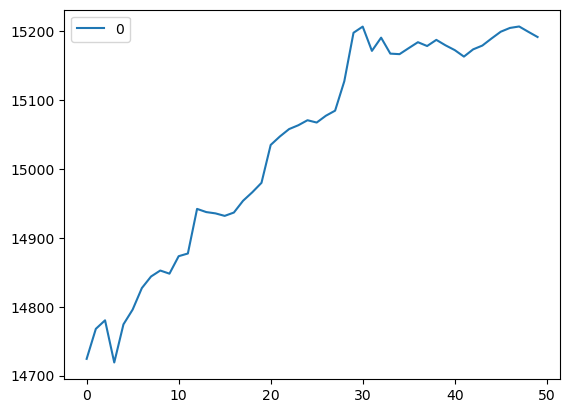

In [33]:
# plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

* As you can see, the MSE and RMSE values increase as we increase the k values. At k= 4, the MSE is approximately 216653458.77, and the RMSE is about 14719.15. The RMSE then increases while the k value rises. We can safely say that k= 4 will give us the best result, as the lower the RMSE score, the better.

In [34]:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [35]:
# Calculating and printing the accuracy of the model
print("Accuracy of the model:")
print(knn.score(X_test, y_test))

Accuracy of the model:
0.9469242900861412


#### Accuracy Score: 94.69%

* The KNN model's accuracy score is around 94.69% while using a test size of 15% and a random state of 1.

# Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [37]:
# Initializing the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=1)  #100 trees in the forest

# Fitting the model on the training data
random_forest.fit(X_train, y_train.values.ravel()) # Using ravel to convert y_train from a DataFrame to a 1D array

# Predicting the test set
y_pred_rf = random_forest.predict(X_test)

In [38]:
# Evaluating the model
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Mean Absolute Error:", rf_mae)
print("R² Score:", rf_r2)

Mean Absolute Error: 1381.5808333333332
R² Score: 0.9527080782167443


#### Accuracy Score: 95.27%

* The Random Forest Regressor model accuracy score is around 95.27% when using 100 trees and a random state of 1.

# Gradient Boosting Regressor

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [40]:
# Initializing the Gradient Boosting Regressor
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)

# Fitting the model on training data
gradient_boosting.fit(X_train, y_train.values.ravel())  # Ensuring y_train is in the correct format

# Predicting the test set
y_pred_gb = gradient_boosting.predict(X_test)

In [41]:
# Evaluating the model
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print("Mean Absolute Error:", gb_mae)
print("R² Score:", gb_r2)

Mean Absolute Error: 1313.314432684156
R² Score: 0.9794679379005762


#### Accuracy Score: 97.95%

* The Gradient Boosting Regressor model accuracy score is around 97.95% when using n_estimators of 100, learning_rate of 0.1, max_depth of 3, and a random_state of 1.
* The Gradient Boosting Regressor also has the best accuracy score out of the three machine learning models.   

In [42]:
data.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


# Summary:

* For my semester-long project, I developed a preliminary predictive analytics model by implementing three different models, including K-Nearest Neighbor, Random Forest, and Gradient Boosting, to predict salary prediction through jobs in the data field. Although the accuracy score was not initially what I had hoped for, it improved significantly after making a few adjustments. A few specific examples included using the original dataset and returning the few columns I dropped before: ' job_title', 'salary_currency', 'salary', and 'employee_residence'. In addition, since the dataset also includes data from jobs in the data field worldwide, I also got rid of the new column I created, which was called 'country_category'. It described whether a job was either in the 'United States' or 'Non-United States', which I thought after implementing the one-hot encoding it would simplify working with the dataset and not create too many columns, but I was wrong.

* Overall, I enjoyed working with this dataset by applying explanatory data analysis to analyze the data and performing multiple machine learning models like K-Nearest Neighbor, Random Forest, and Gradient Boosting to predict the best accuracy possible. This project was a somewhat frustrating but humbling experience. Any feedback or suggestions would be greatly appreciated!  


#### Sources used: 
* https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/#commentModule
* https://www.geeksforgeeks.org/random-forest-regression-in-python/
* https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#:~:text=model_selection%20import%20train_test_split%20%3E%3E%3E%20X,0)%20%3E%3E%3E%20reg.